In [1]:
import pandas as pd , numpy as np, seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [38]:
df.drop(columns = 'deck', inplace = True)

## 1. Select ['age', 'fare', 'embarked_town', 'gender', 'pclass', 'survived'] cols from titanic dataset from seaborn
 

In [39]:
tdf = df[['age', 'fare', 'embark_town', 'sex', 'pclass', 'survived']]
tdf

,age,fare,embark_town,sex,pclass,survived
0,22.0,7.2500,Southampton,male,3,0
1,38.0,65.6344,Cherbourg,female,1,1
2,26.0,7.9250,Southampton,female,3,1
3,35.0,53.1000,Southampton,female,1,1
4,35.0,8.0500,Southampton,male,3,0
...,...,...,...,...,...,...
886,27.0,13.0000,Southampton,male,2,0
887,19.0,30.0000,Southampton,female,1,1
888,19.0,23.4500,Southampton,female,3,0
889,26.0,30.0000,Cherbourg,male,1,1


## 2. Identify and handle outliers in fare with appropriate technique


<Axes: xlabel='fare', ylabel='Count'>

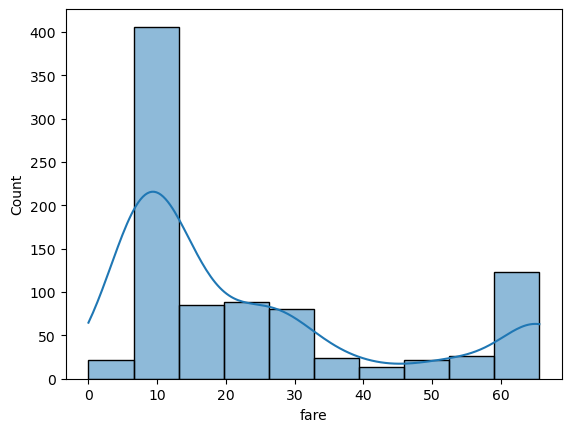

In [41]:
sns.histplot(data = df, x = 'fare',bins=10,kde=True)

<Axes: xlabel='fare'>

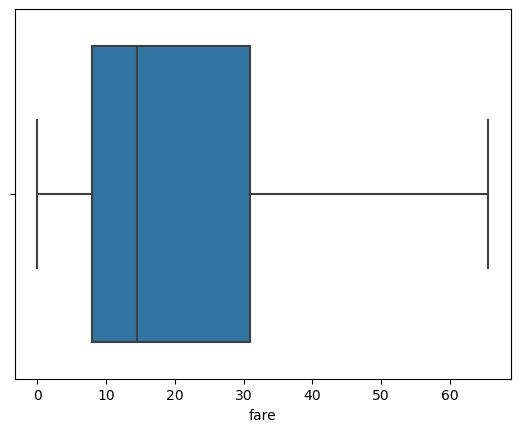

In [42]:
sns.boxplot(data = df, x = 'fare')

## Detecting & Handling Outliers

### Detecting Outliers Using IQR Method

In [43]:
# Calculate the Interquartile Range (IQR)
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['fare'] < lower_bound) | (df['fare'] > upper_bound)

# Display the number of outliers
print("Number of outliers:", outliers.sum())

Number of outliers: 0


In [44]:
lower_bound = Q1 - 1.5 * IQR
lower_bound

-26.724

In [45]:
upper_bound = Q3 + 1.5 * IQR
upper_bound

65.6344

### Handle outliers by capping

<Axes: xlabel='fare'>

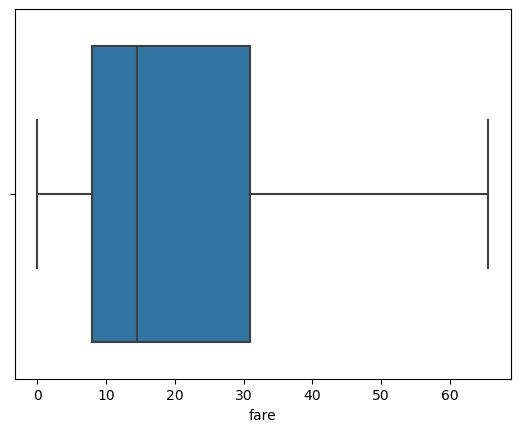

In [46]:
# Handle outliers by capping them to the upper bound
df['fare'] = df['fare'].clip(lower=lower_bound, upper=upper_bound)

sns.boxplot(data = df, x = 'fare')

## 3. Handle Missing Values In Age col

In [47]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

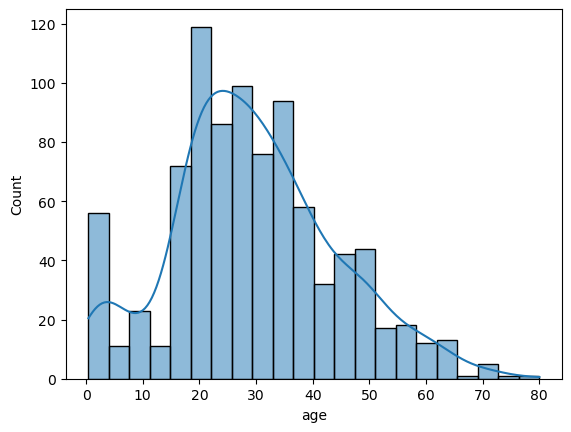

In [48]:
sns.histplot(df['age'], kde=True)

In [49]:
df['age'].ffill(inplace = True)

<Axes: xlabel='age', ylabel='Count'>

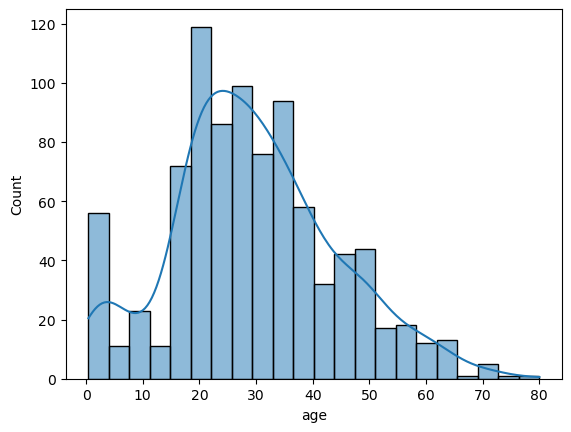

In [50]:
sns.histplot(df['age'], kde=True)

## 4. Perform Uni and Bi variant analysis (both non - visualization & visualization methods)


## Univariant Analysis (Non-Visualization)

In [51]:
tdf

,age,fare,embark_town,sex,pclass,survived
0,22.0,7.2500,Southampton,male,3,0
1,38.0,65.6344,Cherbourg,female,1,1
2,26.0,7.9250,Southampton,female,3,1
3,35.0,53.1000,Southampton,female,1,1
4,35.0,8.0500,Southampton,male,3,0
...,...,...,...,...,...,...
886,27.0,13.0000,Southampton,male,2,0
887,19.0,30.0000,Southampton,female,1,1
888,19.0,23.4500,Southampton,female,3,0
889,26.0,30.0000,Cherbourg,male,1,1


In [52]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          891 non-null    float64
 1   fare         891 non-null    float64
 2   embark_town  889 non-null    object 
 3   sex          891 non-null    object 
 4   pclass       891 non-null    int64  
 5   survived     891 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [53]:
tdf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,891.0,29.581560,14.554590,0.42,20.0000,28.0000,38.0,80.0000
fare,891.0,24.046813,20.481625,0.00,7.9104,14.4542,31.0,65.6344
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000


In [54]:
tdf.describe(include = 'object').T

,count,unique,top,freq
embark_town,889,3,Southampton,644
sex,891,2,male,577


## Univariant Analysis (Visualization)

### Histogram for 'age'

<Axes: xlabel='age', ylabel='Count'>

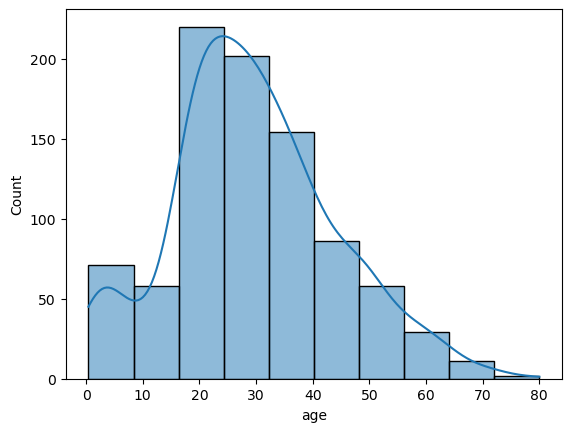

In [55]:
sns.histplot(data = tdf, x = 'age', bins=10, kde=True)

### Histogram for 'fare'

<Axes: xlabel='fare', ylabel='Count'>

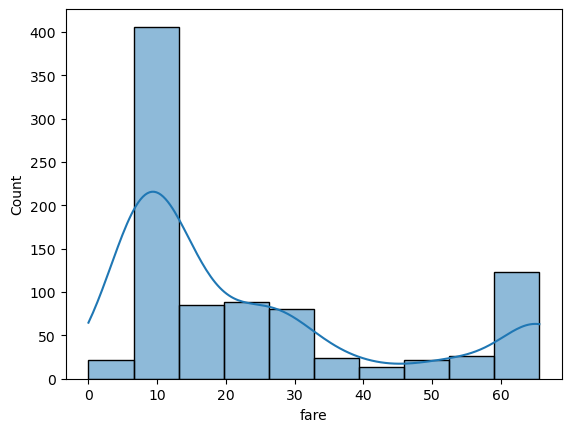

In [58]:
sns.histplot(data = tdf, x = 'fare', bins=10, kde=True)

### Count plot for 'sex'

<Axes: xlabel='sex', ylabel='count'>

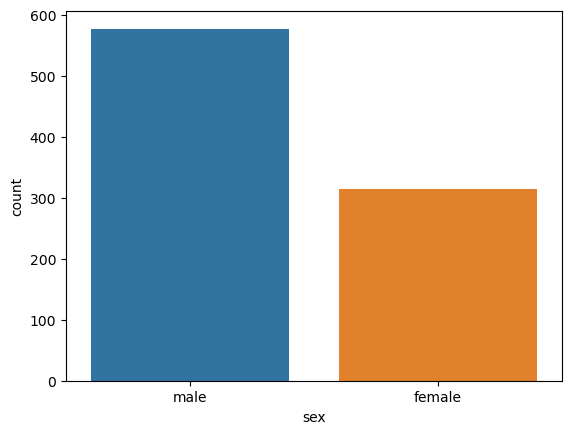

In [59]:
sns.countplot(data = tdf, x = 'sex')

### Countplot for 'pclass'

<Axes: xlabel='pclass', ylabel='count'>

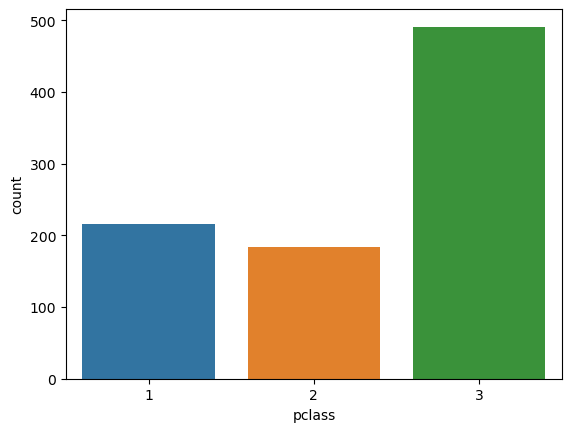

In [60]:
sns.countplot(data = tdf, x = 'pclass')

### Countplot for 'survived'

<Axes: xlabel='survived', ylabel='count'>

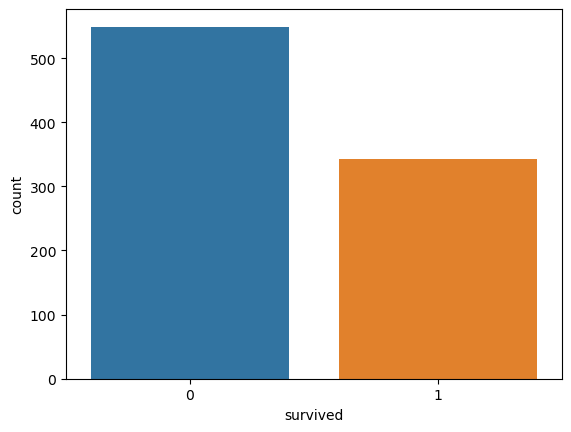

In [61]:
sns.countplot(data = tdf, x = 'survived')

### Countplot for 'embark_town'

<Axes: xlabel='embark_town', ylabel='count'>

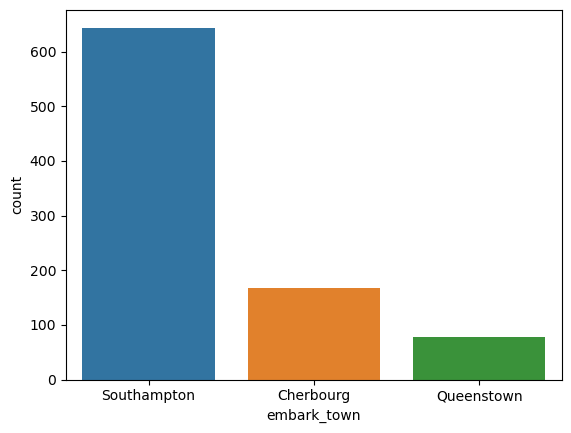

In [62]:
sns.countplot(data = tdf, x = 'embark_town')

## Bivariant Analysis (Visualization)

### Analysis by Histogram

<Axes: xlabel='age', ylabel='Count'>

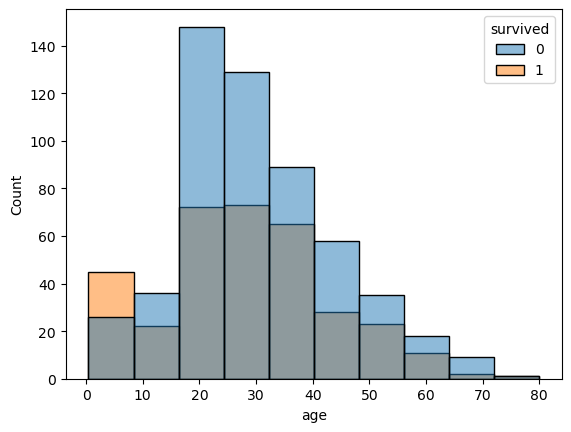

In [63]:
sns.histplot(data = tdf, x = 'age', hue = 'survived', bins = 10)

<Axes: xlabel='age', ylabel='Count'>

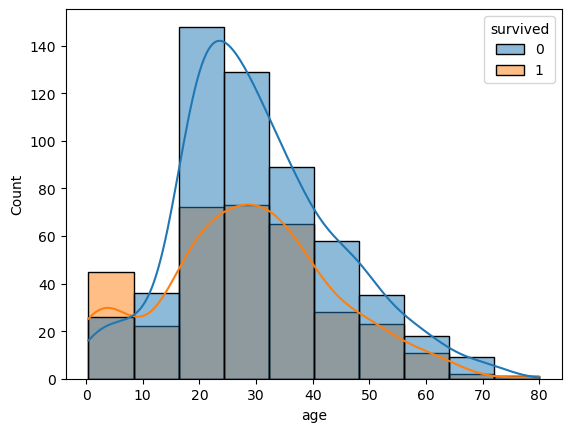

In [64]:
sns.histplot(data = tdf, x = 'age', hue = 'survived', bins = 10, kde = True)

<Axes: xlabel='age', ylabel='Count'>

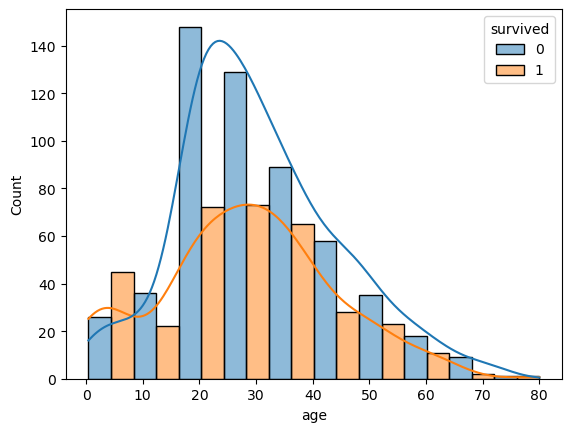

In [65]:
sns.histplot(data = tdf, x = 'age', hue = 'survived', bins = 10, kde = True, multiple = 'dodge')

<Axes: xlabel='age', ylabel='Count'>

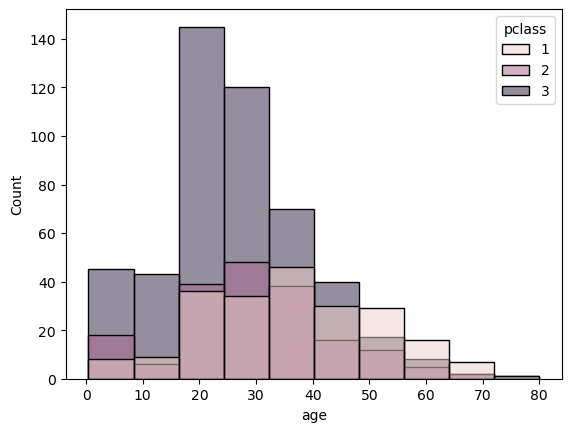

In [66]:
sns.histplot(data = tdf, x = 'age', hue = 'pclass', bins = 10)

<Axes: xlabel='age', ylabel='Count'>

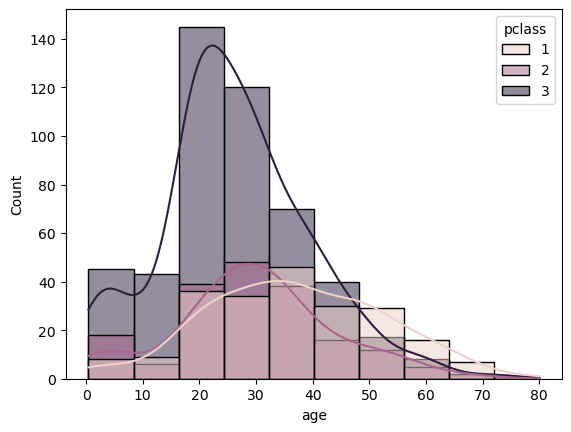

In [67]:
sns.histplot(data = tdf, x = 'age', hue = 'pclass', bins = 10, kde = True)

<Axes: xlabel='age', ylabel='Count'>

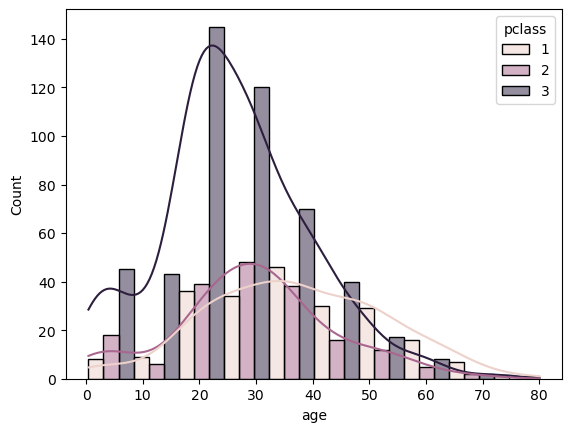

In [68]:
sns.histplot(data = tdf, x = 'age', hue = 'pclass', bins = 10, kde = True, multiple = 'dodge')

<Axes: xlabel='fare', ylabel='Count'>

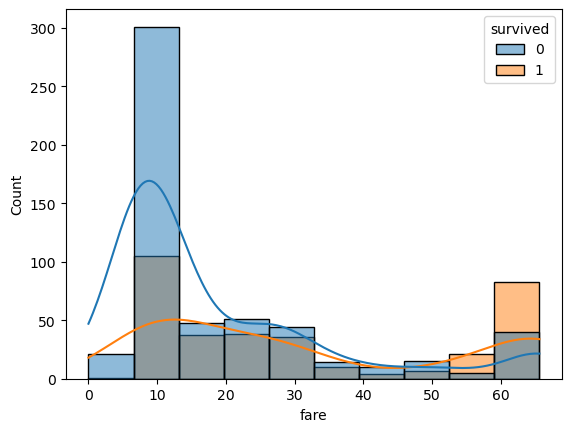

In [69]:
sns.histplot(data = tdf, x = 'fare', hue = 'survived', bins = 10, kde = True)

<Axes: xlabel='fare', ylabel='Count'>

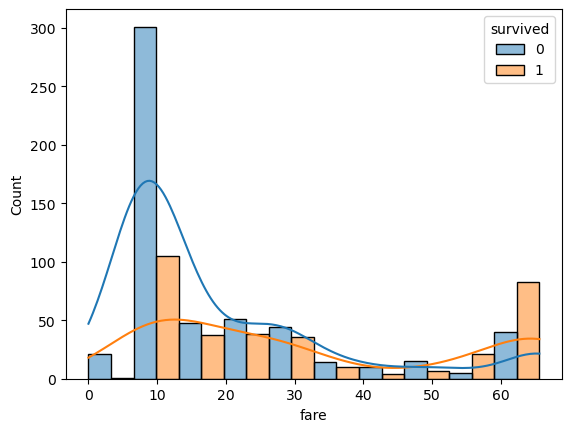

In [70]:
sns.histplot(data = tdf, x = 'fare', hue = 'survived', bins = 10, kde = True, multiple = 'dodge')

<Axes: xlabel='fare', ylabel='Count'>

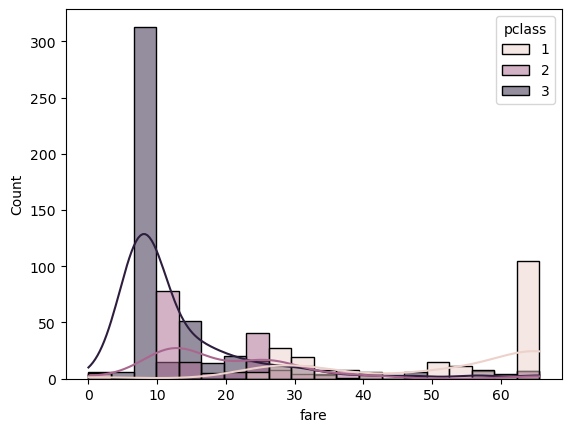

In [71]:
sns.histplot(data = tdf, x = 'fare', hue = 'pclass', bins = 20, kde = True)

<Axes: xlabel='fare', ylabel='Count'>

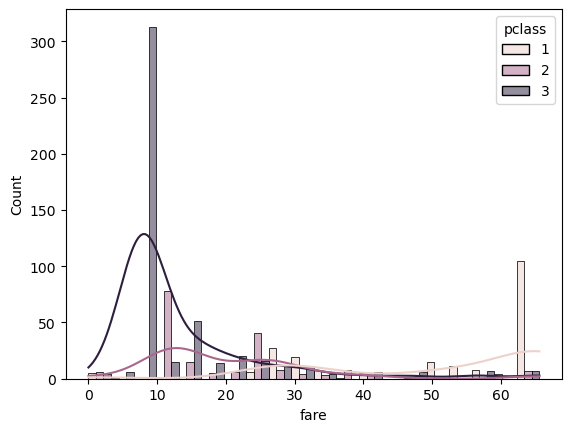

In [72]:
sns.histplot(data = tdf, x = 'fare', hue = 'pclass', bins = 20, kde = True, multiple = 'dodge')

### Analysis by Countplot

<Axes: xlabel='survived', ylabel='count'>

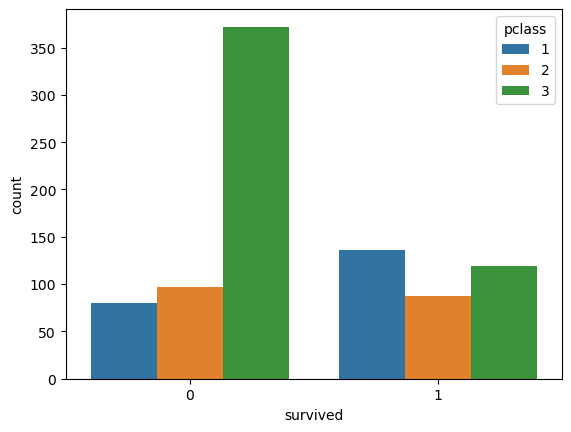

In [73]:
sns.countplot(data = tdf, x = 'survived', hue = 'pclass')

<Axes: xlabel='survived', ylabel='count'>

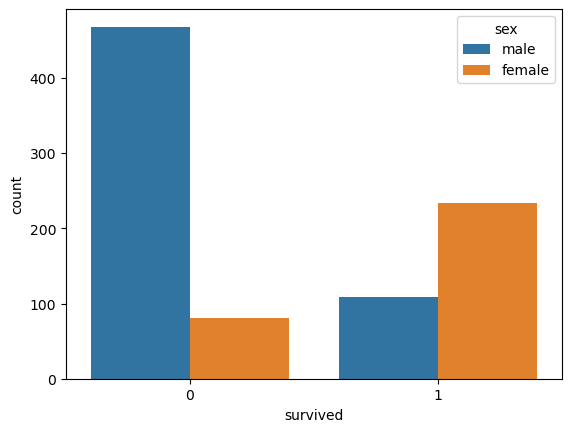

In [74]:
sns.countplot(data = tdf, x = 'survived', hue = 'sex')

<Axes: xlabel='survived', ylabel='count'>

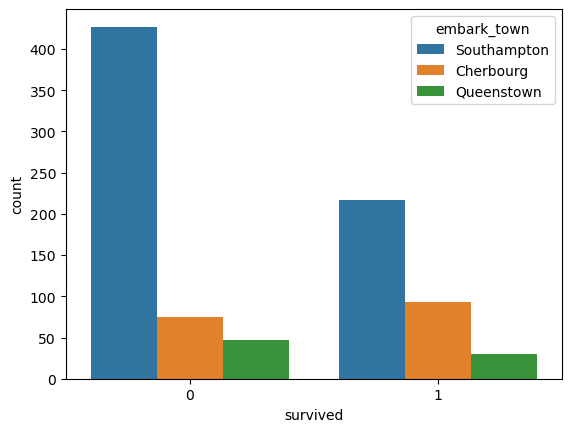

In [75]:
sns.countplot(data = tdf, x = 'survived', hue = 'embark_town')